# Project Tasks

### Test 1: Play each sound and record human matching

In [27]:
import numpy as np
from glob import glob
from pathlib import Path
from scipy.io import wavfile
from IPython.display import Audio
import matplotlib.pyplot as plt
from scipy.signal import stft

In [ ]:

data_folder = Path().resolve() / "Audio Files"

twelve_test_files = glob(f'{data_folder}\Twelve Test\*.wav')
twelve_train_files = glob(f'{data_folder}\Twelve Train\*.wav')
zero_test_files = glob(f'{data_folder}\Zero Test\*.wav')
zero_train_files = glob(f'{data_folder}\Zero Train\*.wav')

#### "Zero" Training 

In [17]:
zero_train_arrays = []
for file_path in zero_train_files:
    sample_rate, audio_data = wavfile.read(file_path)
    zero_train_arrays.append(np.array(audio_data))
print(f"Number of audio files: {len(zero_train_arrays)}")

Number of audio files: 18


In [18]:
recording_num = 10
Audio(zero_train_arrays[recording_num], rate=sample_rate)

#### "Zero" Testing 

In [19]:
zero_test_arrays = []
for file_path in zero_test_files:
    sample_rate, audio_data = wavfile.read(file_path)
    zero_test_arrays.append(np.array(audio_data))
print(f"Number of audio files: {len(zero_test_arrays)}")

Number of audio files: 18


In [20]:
recording_num = 10
Audio(zero_test_arrays[recording_num], rate=sample_rate)

#### "Twelve" Training 

In [21]:
twelve_train_arrays = []
for file_path in twelve_train_files:
    sample_rate, audio_data = wavfile.read(file_path)
    twelve_train_arrays.append(np.array(audio_data))
print(f"Number of audio files: {len(twelve_train_arrays)}")

Number of audio files: 18


In [22]:
recording_num = 10
Audio(twelve_train_arrays[recording_num], rate=sample_rate)

#### "Twelve" Testing 

In [23]:
twelve_test_arrays = []
for file_path in twelve_test_files:
    sample_rate, audio_data = wavfile.read(file_path)
    twelve_test_arrays.append(np.array(audio_data))
print(f"Number of audio files: {len(twelve_test_arrays)}")

Number of audio files: 18


In [24]:
recording_num = 0
Audio(twelve_test_arrays[recording_num], rate=sample_rate)

### Test 2: Play a sound, plot, and answer how long is 256 samples in time.

Sample rate: 48000
Milliseconds in 256 samples: 5.333333333333333


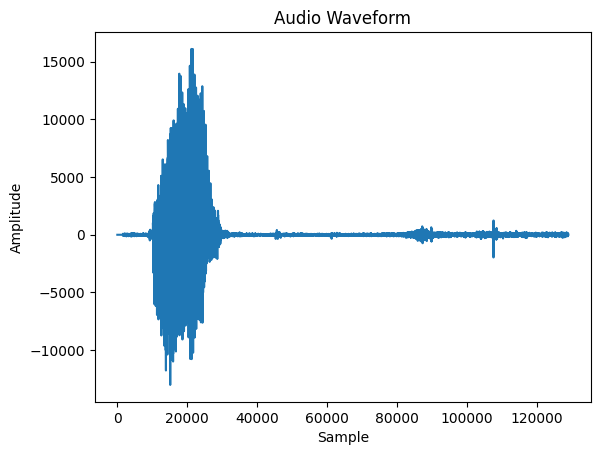

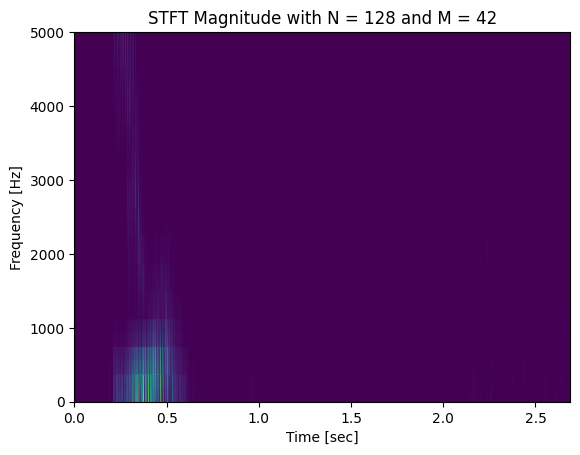

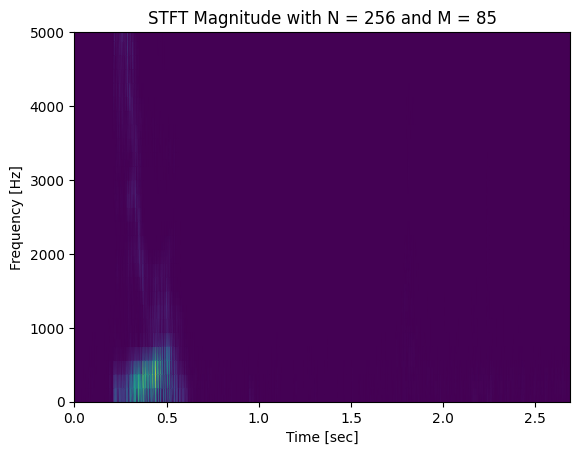

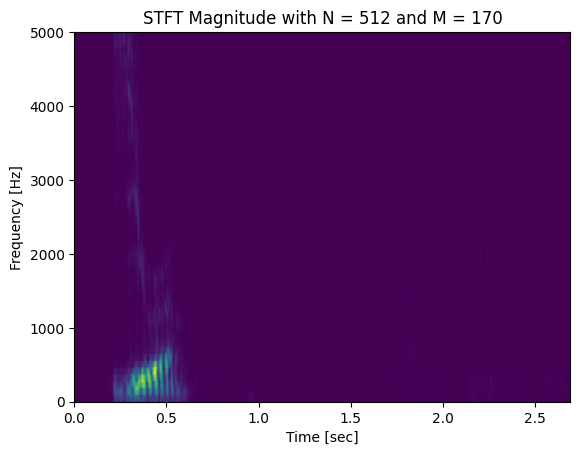

In [30]:
arrays = {
    'zero_train': zero_train_arrays,
    'zero_test': zero_test_arrays,
    'twelve_train': twelve_train_arrays,
    'twelve_test': twelve_test_arrays,
}

chosen_array = 'twelve_train'
chosen_sample = 3

currentData = arrays[chosen_array][chosen_sample]

print(f"Sample rate: {sample_rate}")
numSamples = 256
mseconds = numSamples/sample_rate * 1000
print(f"Milliseconds in 256 samples: {mseconds}")

plt.plot(currentData)
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Audio Waveform')
plt.show()

# STFT
frame_sizes = [32, 64, 128, 256, 512, 1024, 2048, 4096]
for N in frame_sizes:
    M = N // 3
    f, t, Zxx = stft(currentData, fs=sample_rate, nperseg=N, noverlap=M)
    plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud')
    plt.title(f'STFT Magnitude with N = {N} and M = {M}')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.ylim(0, 5000)
    plt.show()